<h1>Project Data Mining</h1>
<br><h2>Sentiment Analysis on tweets</h2>
<br><b>Editors: </b>
<br>Aslanidis Theofanis - Athinaios Konstantinos

<b>1)</b> Importing all needed packages: <br>
<ul>
    <li><b>nltk:</b> used for tokenization
    <li><b>pandas:</b> data representation
    <li><b>WordCloud:</b> data representation
<ul>


In [37]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer, word_tokenize, TweetTokenizer
from wordcloud import WordCloud
import pickle

#nltk.download('punkt')
#nltk.download('stopwords')

<b>2)</b> Loading tweeter datasets for training and testing:
<ul>
    <li><u>Value</u> for negative-positive-neutral
    <li><u>Tweet</u> for the text
</ul>

In [3]:
train_data = pd.read_csv("../twitter_data/train2017.tsv", names=['Value', 'Tweet'], sep='\t', usecols = [2, 3])
test_data = pd.read_csv("../twitter_data/test2017.tsv", names=['Value', 'Tweet'], sep='\t', usecols = [2, 3])
train_data.head()

,Value,Tweet
0,positive,Gas by my house hit $3.39!!!! I'm going to Cha...
1,negative,"Theo Walcott is still shit, watch Rafa and Joh..."
2,negative,"its not that I'm a GSP fan, i just hate Nick D..."
3,negative,Iranian general says Israel's Iron Dome can't ...
4,neutral,"Tehran, Mon Amour: Obama Tried to Establish Ti..."


<h4>Our pipeline:</h4><br>
<ol>
    <li>Load the raw text.
    <li>Split into tokens.
    <li>Convert to lowercase.
    <li>Filter out tokens that are stop words.
    <li>Stemming
</ol>
<br>    
<b>Tokenize tweets and convert all to lowercase</b>


In [4]:
tweets = []
values = []
tokenizer = TweetTokenizer()
for tweet in train_data.T:
    tweets.append(tokenizer.tokenize(train_data.T[tweet][1].lower()))
    values.append(train_data.T[tweet][0])

<b>Remove Stop Words</b>

In [5]:
# filter out stop words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
for x in range(0,len(tweets)):
    tweets[x] = [token for token in tweets[x] if not token in stop_words and token.isalpha()]

<b>Stemming (Reducing each word to its root).</b>

In [6]:
# stemming of words
from nltk.stem.porter import PorterStemmer

stemmed = []
porter = PorterStemmer()
for x in range(0,len(tweets)):
    stemmed.append([porter.stem(token) for token in tweets[x]])

In [7]:
print(tweets[0], "\n", stemmed[0])

['gas', 'house', 'hit', 'going', 'chapel', 'hill', 'sat'] 
 ['ga', 'hous', 'hit', 'go', 'chapel', 'hill', 'sat']


<h2>Data Analysis</h2>
<br><h4>Characteristics:</h4>
<ul>
    <li><b>Most Frequent</b> words in whole training dataset.
    <li><b>Most Frequent Positive, Negative and Neutral </b> words.
<ul>

In [8]:
from collections import Counter
total_counter = Counter()
positive_counter = Counter()
negative_counter = Counter()
neutral_counter = Counter()
j=0
for i in tweets[0:]: 
    total_counter.update(i)
    if(values[j] == "positive"):
        positive_counter.update(i)
    if(values[j] == "negative"):
        negative_counter.update(i)
    if(values[j] == "neutral"):
        neutral_counter.update(i)
    j+=1
dict(total_counter)
dict(positive_counter)
dict(negative_counter)
dict(neutral_counter)

data = {'Total': total_counter, 'Positive': positive_counter, 'Negative': negative_counter, 'Neutral': neutral_counter}
fp = DataFrame(data, index =total_counter.keys(), columns =['Total','Positive','Negative', 'Neutral'])

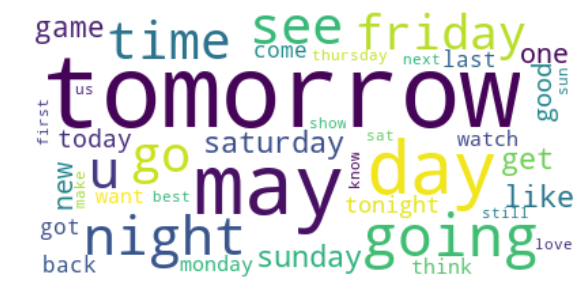

In [10]:
# Create and generate a word cloud image:
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=40).generate_from_frequencies(total_counter)

plt.figure(figsize=(12,5))
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3>Graph showing the exact Frequency of appearance for the Most Frequent Words</h3>

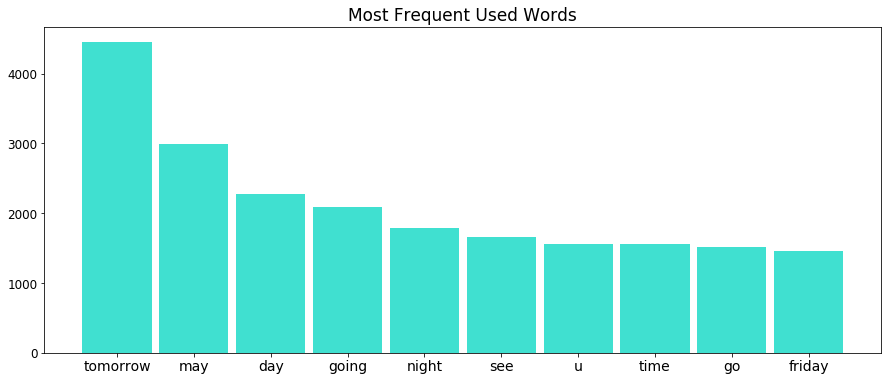

In [11]:
# Choose the names of the bars
words = list(wc.words_.keys())

# Find frequencies
freq = []
for word in words:
    freq.append(total_counter[word])
    
#np array
y_pos = np.arange(len(words[:10]))

#size
plt.figure(figsize=(15,6))
plt.title("Most Frequent Used Words", fontsize=17)

# Create bars
plt.bar(y_pos, freq[:10], color='turquoise', width=0.9)
 
# Create names on the x-axis
plt.xticks(y_pos, words, color='black', fontsize=14)
plt.yticks(color='black', fontsize=12)
plt.show()

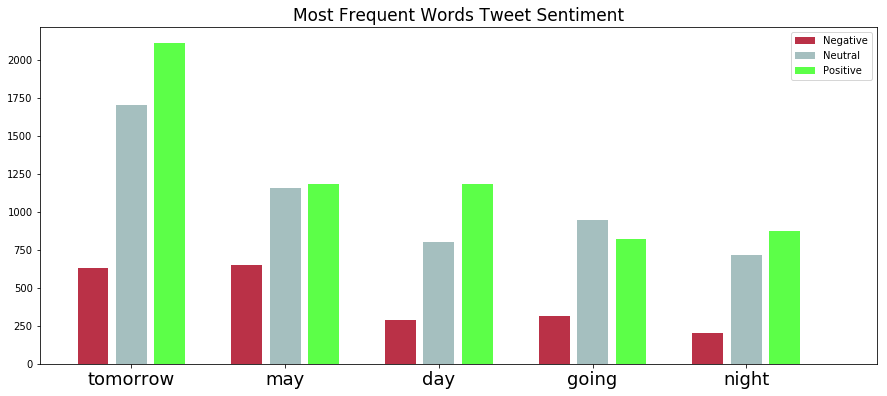

In [12]:
#FiveMostFrequent
FiveMostFrequent = list(wc.words_.keys())[:5]

# Create bars
barWidth = 0.8
bars1 = []
bars2 = []
bars3 = []
for word in FiveMostFrequent:
    bars1.append(negative_counter[word])
    bars2.append(neutral_counter[word])
    bars3.append(positive_counter[word])
    
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,5,9,13,17]
r2 = [2,6,10,14,18]
r3 = [3,7,11,15,19]
sep =[4,8,12,16,20]
r4 = r1 + r2 + r3 + sep

# plot size
plt.figure(figsize=(15,6))

# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.7,0.1,0.2,0.9), label='Negative')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.5,0.5), label='Neutral')
plt.bar(r3, bars3, width = barWidth, color = (0.2,1.0,0.1,0.8), label='Positive')
plt.bar(sep, [0,0,0,0,0], width = barWidth, color = (0.0,0.0,0.0,0.0))
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
plt.title("Most Frequent Words Tweet Sentiment", fontsize=17) 
# Text below each barplot with a rotation at 90°
plt.xticks([4*r + barWidth*2.5 for r in range(len(FiveMostFrequent))], FiveMostFrequent, fontsize=18)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()

<h3>Below we have the most Positive words</h3><br>
<b>Not only measured by appearances on positive tweets </b>, but the <b>ratio between positive and negative</b> is very high<br>
Which means that they appeared exponentially more times in positive tweets rather than negative ones.<br>
That way we have a more representative result.

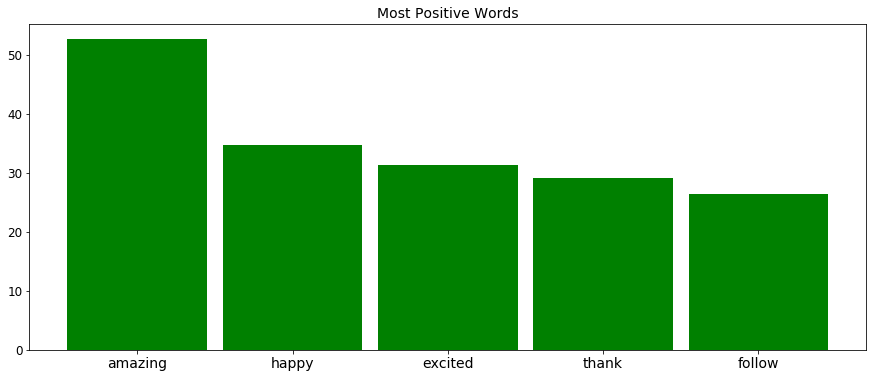

In [13]:
UsedWords = [word for word in total_counter.keys() if total_counter[word] >= 100]
UsedWords.sort(key=lambda word: (positive_counter[word]/negative_counter[word]), reverse=True)
HighRatioWords = UsedWords[:5]

# Find ratio
ratio = []
for word in HighRatioWords:
    ratio.append(positive_counter[word]/negative_counter[word])
#np array
y_pos = np.arange(len(HighRatioWords))
#size
plt.figure(figsize=(15,6))

# Create bars
plt.bar(y_pos, ratio, color='green', width=0.9)
 
# Create names on the x-axis
plt.title('Most Positive Words', fontsize=14)
plt.xticks(y_pos, HighRatioWords, color='black', fontsize=14)
plt.yticks(color='black', fontsize=12)
plt.show()

<h2>OBSERVATION !</h2>
<h4>As we see, "tomorrow" has the most appearances in positive tweets, but the ones that are used purely on positive tweets are "amazing", "happy", "excited" ... </h4>


<h3>Same way as above now we have the most Negative words</h3><br>
<b>Not only measured by appearances on negative tweets </b>, but the <b>ratio between positive and negative</b> is very low<br>
Which means that they appeared exponentially more times in negative tweets rather than positive ones.<br>
That way we have a more representative result.

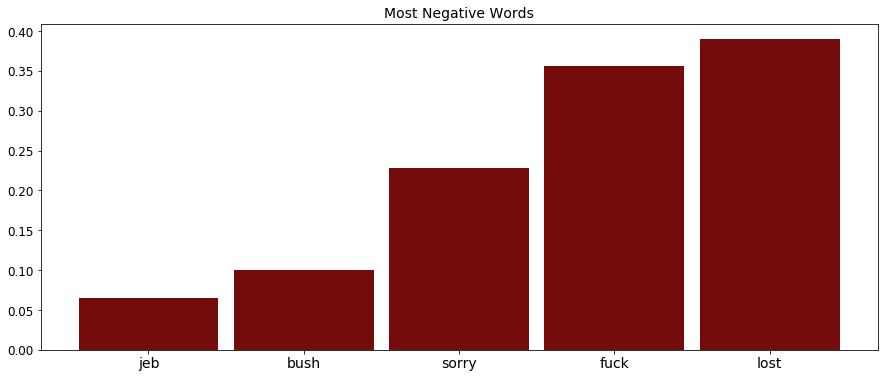

In [30]:
UsedWords = [word for word in total_counter.keys() if total_counter[word] >= 100]
UsedWords.sort(key=lambda word: (positive_counter[word]/negative_counter[word]))
LowRatioWords = UsedWords[:5]

# Find ratio
ratio = []
for word in LowRatioWords:
    ratio.append(positive_counter[word]/negative_counter[word])
#np array
y_pos = np.arange(len(LowRatioWords))
#size
plt.figure(figsize=(15,6))

# Create bars
plt.bar(y_pos, ratio, color='#750c0c', width=0.9)
 
# Create names on the x-axis
plt.title('Most Negative Words', fontsize=14)
plt.xticks(y_pos, LowRatioWords, color='black', fontsize=14)
plt.yticks(color='black', fontsize=12)
plt.show()

<h1>Vectorization</h1>
<br>
<h2> Bag Of Words</h2>
Create bow and store it with pickle

<b>Run this only if you want to do the vectorization</b><br>
Carefull you will have to store it later!!!

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

#vectorization
bow_vectorizer = CountVectorizer(max_features=1000) 
bow_xtrain = bow_vectorizer.fit_transform(train_data['Tweet'])  #TWEETS : a list with the actual tweets

<b>Run this only if you excecuted the above cell and you want to save the vector<b>

In [46]:
#store bow using pickle
filename = 'bag_of_words.sav'
pickle.dump(bow_xtrain, open(filename, 'wb'))

<b>Run this only if you have already stored the bag of words</b> and you wish to load it instead of computing it.

In [ ]:
#load stored model
bow_xtrain = pickle.load(open(filename, 'rb'))

<h2>TF-IDF</h2>

<b>Run this only if you want to do the vectorization</b><br>
Carefull you will have to store it later!!!

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 
tfidf = tfidf_vectorizer.fit_transform(train_data['Tweet'])  #TWEETS : a list with the actual tweets

<b>Run this only if you excecuted the above cell and you want to save the vector<b>

In [63]:
#store bow using pickle
filename = 'tf_idf.sav'
pickle.dump(tfidf, open(filename, 'wb'))

<b>Run this only if you have already stored the bag of words</b> and you wish to load it instead of computing it.

In [ ]:
#load stored model
tfidf = pickle.load(open(filename, 'rb'))

<h2>Word Embeddings</h2><br>
Using: <br>
1. Tokenized tweets<br>
2. Stemmed tweets<br><br>
What is the difference ?

In [60]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
            tweets,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 8, # no.of cores
            seed = 34) 

model_w2v.train(tweets, total_examples= len(tweets), epochs=20)

(5034634, 5636720)

<b>Run this only if you excecuted the above cell and you want to save the vector<b>

In [65]:
#store bow using pickle
filename = 'word_embed.sav'
pickle.dump(model_w2v, open(filename, 'wb'))

<b>Else Run this if you have already stored the bag of words to load it instead of computing it.</b>

In [ ]:
#load stored model
model_w2v = pickle.load(open(filename, 'rb'))

Now we trained model for epochs and it is ready.<br>
Let's play with our trained model and see some results.

In [67]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.9328731298446655),
 ('propose', 0.6195869445800781),
 ('jeb', 0.5790714025497437),
 ('loyalty', 0.5595628023147583),
 ('stance', 0.5569074153900146),
 ('bush', 0.550118088722229),
 ('billionaire', 0.5412615537643433),
 ('suggested', 0.5399881601333618),
 ('inequality', 0.5356480479240417),
 ('establishment', 0.5351815223693848)]

As we see those are the words that are seen with trump and developed a semantic relationship.